# **Desafío Alura: Telecom X 2da parte**

## **Importación de Datos**

In [1]:
import pandas as pd

In [2]:
telecom= pd.read_csv('telecom_datos_tratados.csv')
telecom

,customer_tenure,Churn,account_Contract,internet_InternetService,account_PaymentMethod,account_Charges_Monthly,account_Charges_Total,cuentas_diarias
0,9,No,One year,DSL,Mailed check,65.60,593.30,2.186667
1,9,No,Month-to-month,DSL,Mailed check,59.90,542.40,1.996667
2,4,Yes,Month-to-month,Fiber optic,Electronic check,73.90,280.85,2.463333
3,13,Yes,Month-to-month,Fiber optic,Electronic check,98.00,1237.85,3.266667
4,3,Yes,Month-to-month,Fiber optic,Mailed check,83.90,267.40,2.796667
...,...,...,...,...,...,...,...,...
7027,13,No,One year,DSL,Mailed check,55.15,742.90,1.838333
7028,22,Yes,Month-to-month,Fiber optic,Electronic check,85.10,1873.70,2.836667
7029,2,No,Month-to-month,DSL,Mailed check,50.30,92.75,1.676667
7030,67,No,Two year,DSL,Mailed check,67.85,4627.65,2.261667


In [3]:
telecom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   customer_tenure           7032 non-null   int64  
 1   Churn                     7032 non-null   object 
 2   account_Contract          7032 non-null   object 
 3   internet_InternetService  7032 non-null   object 
 4   account_PaymentMethod     7032 non-null   object 
 5   account_Charges_Monthly   7032 non-null   float64
 6   account_Charges_Total     7032 non-null   float64
 7   cuentas_diarias           7032 non-null   float64
dtypes: float64(3), int64(1), object(4)
memory usage: 439.6+ KB


## **Encoding**

In [4]:
columnas_categoricas= telecom[['Churn','account_Contract','internet_InternetService','account_PaymentMethod']]
columnas_categoricas

,Churn,account_Contract,internet_InternetService,account_PaymentMethod
0,No,One year,DSL,Mailed check
1,No,Month-to-month,DSL,Mailed check
2,Yes,Month-to-month,Fiber optic,Electronic check
3,Yes,Month-to-month,Fiber optic,Electronic check
4,Yes,Month-to-month,Fiber optic,Mailed check
...,...,...,...,...
7027,No,One year,DSL,Mailed check
7028,Yes,Month-to-month,Fiber optic,Electronic check
7029,No,Month-to-month,DSL,Mailed check
7030,No,Two year,DSL,Mailed check


In [5]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
le = LabelEncoder()

# Apply LabelEncoder to each column in columnas_categoricas
for column in columnas_categoricas.columns:
    columnas_categoricas[column] = le.fit_transform(columnas_categoricas[column])

display(columnas_categoricas.head())

/tmp/ipython-input-3775177065.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  columnas_categoricas[column] = le.fit_transform(columnas_categoricas[column])
/tmp/ipython-input-3775177065.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  columnas_categoricas[column] = le.fit_transform(columnas_categoricas[column])
/tmp/ipython-input-3775177065.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the

,Churn,account_Contract,internet_InternetService,account_PaymentMethod
0,0,1,0,3
1,0,0,0,3
2,1,0,1,2
3,1,0,1,2
4,1,0,1,3


In [8]:
columnas_numericas = telecom.select_dtypes(include=['int64', 'float64'])
display(columnas_numericas.head())

,customer_tenure,account_Charges_Monthly,account_Charges_Total,cuentas_diarias
0,9,65.6,593.30,2.186667
1,9,59.9,542.40,1.996667
2,4,73.9,280.85,2.463333
3,13,98.0,1237.85,3.266667
4,3,83.9,267.40,2.796667


In [45]:
telecom_encoded = pd.concat([columnas_numericas, columnas_categoricas], axis=1)
display(telecom_encoded.head())

,customer_tenure,account_Charges_Monthly,account_Charges_Total,cuentas_diarias,Churn,account_Contract,internet_InternetService,account_PaymentMethod
0,9,65.6,593.30,2.186667,0,1,0,3
1,9,59.9,542.40,1.996667,0,0,0,3
2,4,73.9,280.85,2.463333,1,0,1,2
3,13,98.0,1237.85,3.266667,1,0,1,2
4,3,83.9,267.40,2.796667,1,0,1,3


## **Verificación de la Proporción de Cancelación (Churn)**

In [10]:
telecom_encoded['Churn'].value_counts()

,count
Churn,
0,5163
1,1869


In [15]:
churn_ratio = telecom_encoded['Churn'].value_counts()[1] / telecom_encoded['Churn'].value_counts()[0]
print(f"La proporción de clientes que se dieron de baja (1) con respecto a los clientes que no se dieron de baja (0) es: {churn_ratio}")

La proporción de clientes que se dieron de baja (1) con respecto a los clientes que no se dieron de baja (0) es: 0.36199883788495063


### Para explicarlo de forma más clara, cada que 100 clientes se quedan, 36 se van

In [22]:
X_resampled

,customer_tenure,account_Charges_Monthly,account_Charges_Total,cuentas_diarias,account_Contract,internet_InternetService,account_PaymentMethod
0,9,65.60,593.30,2.186667,1,0,3
1,9,59.90,542.40,1.996667,0,0,3
2,4,73.90,280.85,2.463333,0,1,2
3,13,98.00,1237.85,3.266667,0,1,2
4,3,83.90,267.40,2.796667,0,1,3
...,...,...,...,...,...,...,...
10321,15,19.40,289.30,0.646667,0,2,0
10322,22,59.00,1254.70,1.966667,0,0,2
10323,15,86.20,1270.20,2.873333,0,1,2
10324,51,94.65,4812.75,3.155000,0,1,2


## **Normalización o Estandarización**

In [25]:
from sklearn.preprocessing import StandardScaler

# Initialize StandardScaler
scaler = StandardScaler()

# Identify numerical columns to scale (excluding the target variable if it's in telecom_encoded)
# Assuming 'Churn' is the target and is already encoded
numerical_cols = telecom_encoded.select_dtypes(include=['int64', 'float64']).columns.tolist()
if 'Churn' in numerical_cols:
    numerical_cols.remove('Churn')

# Apply StandardScaler to the numerical columns
telecom_encoded[numerical_cols] = scaler.fit_transform(telecom_encoded[numerical_cols])

display(telecom_encoded.head())

,customer_tenure,account_Charges_Monthly,account_Charges_Total,cuentas_diarias,Churn,account_Contract,internet_InternetService,account_PaymentMethod
0,-0.954296,0.026652,-0.745607,0.026652,0,0.373926,-1.183614,1.336636
1,-0.954296,-0.162819,-0.768063,-0.162819,0,-0.826735,-1.183614,1.336636
2,-1.158016,0.302548,-0.883456,0.302548,1,-0.826735,0.172835,0.399805
3,-0.791321,1.103642,-0.461240,1.103642,1,-0.826735,0.172835,0.399805
4,-1.198760,0.634952,-0.889390,0.634952,1,-0.826735,0.172835,1.336636


In [26]:
telecom_encoded.describe()

,customer_tenure,account_Charges_Monthly,account_Charges_Total,cuentas_diarias,Churn,account_Contract,internet_InternetService,account_PaymentMethod
count,7.032000e+03,7.032000e+03,7.032000e+03,7.032000e+03,7032.000000,7.032000e+03,7.032000e+03,7.032000e+03
mean,-1.111486e-16,5.860563e-17,8.285623e-17,8.386668e-17,0.265785,1.414619e-17,7.982491e-17,5.304820e-17
std,1.000071e+00,1.000071e+00,1.000071e+00,1.000071e+00,0.441782,1.000071e+00,1.000071e+00,1.000071e+00
min,-1.280248e+00,-1.547283e+00,-9.990692e-01,-1.547283e+00,0.000000,-8.267348e-01,-1.183614e+00,-1.473857e+00
25%,-9.542963e-01,-9.709769e-01,-8.302488e-01,-9.709769e-01,0.000000,-8.267348e-01,-1.183614e+00,-5.370259e-01
50%,-1.394171e-01,1.845440e-01,-3.908151e-01,1.845440e-01,0.000000,-8.267348e-01,1.728354e-01,3.998052e-01
75%,9.199259e-01,8.331482e-01,6.668271e-01,8.331482e-01,1.000000,3.739259e-01,1.728354e-01,3.998052e-01
max,1.612573e+00,1.793381e+00,2.824261e+00,1.793381e+00,1.000000,1.574587e+00,1.529285e+00,1.336636e+00


## **Análisis de Correlación**

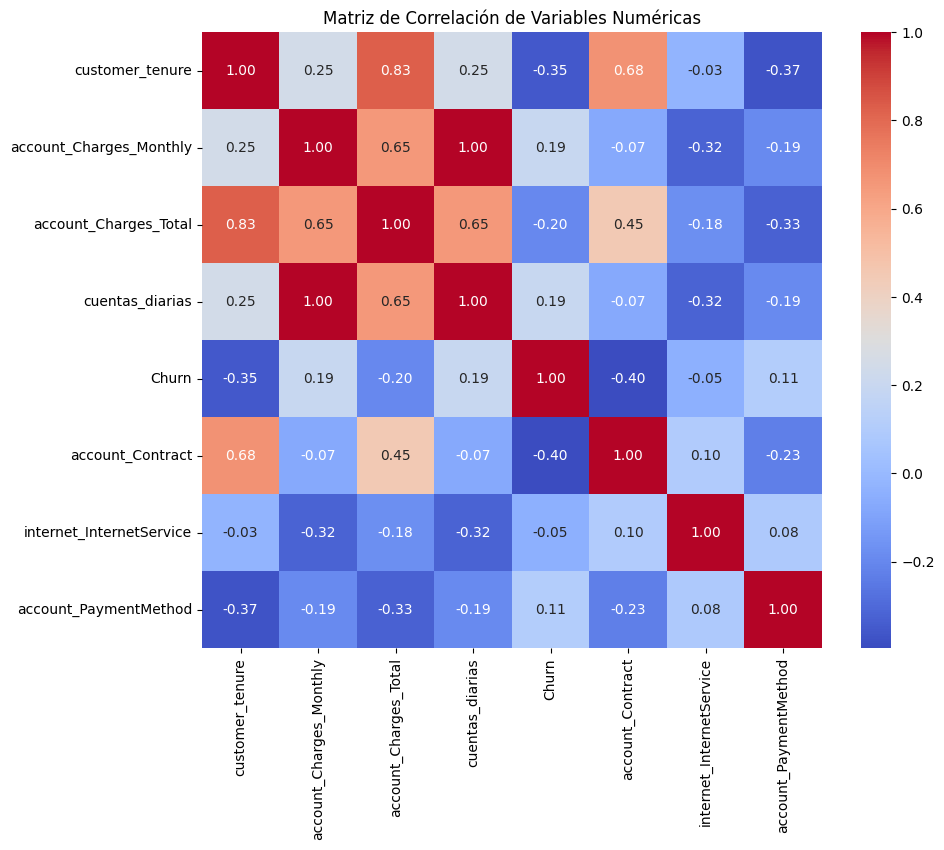

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the correlation matrix
correlation_matrix = telecom_encoded.corr()

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlación de Variables Numéricas')
plt.show()

## **Análisis Dirigido**

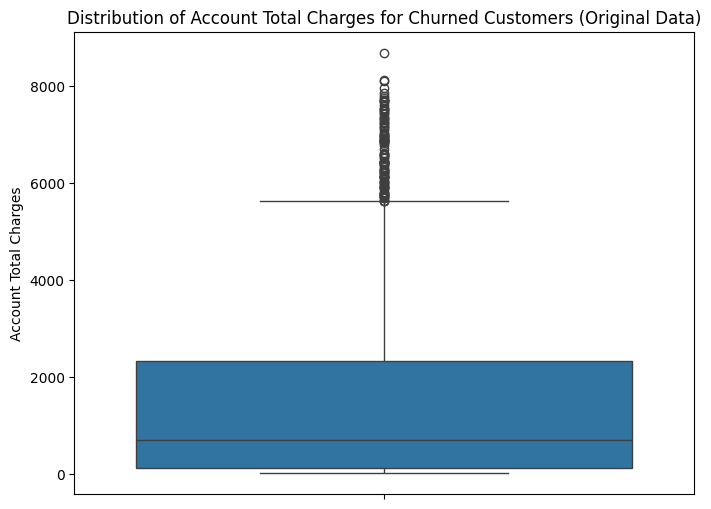

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filter the data for churned customers (Churn == 1)
churned_customers = telecom[telecom['Churn'] == 'Yes']

# Create a boxplot of account_Charges_Total for churned customers
plt.figure(figsize=(8, 6))
sns.boxplot(y=churned_customers['account_Charges_Total'])
plt.title('Distribution of Account Total Charges for Churned Customers (Original Data)')
plt.ylabel('Account Total Charges')
plt.show()

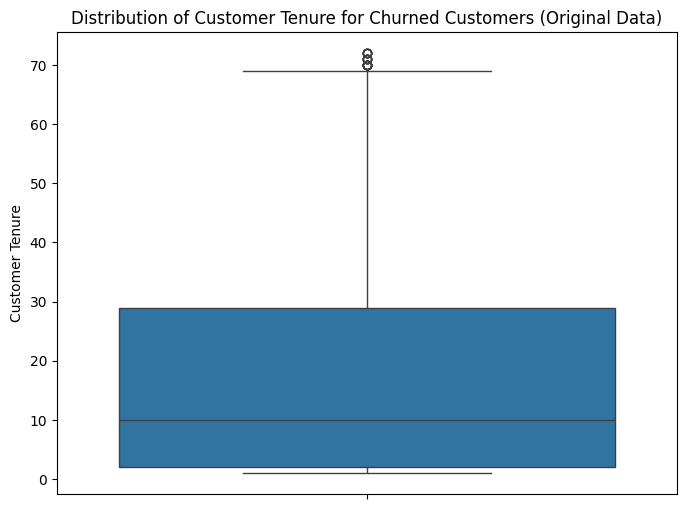

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filter the data for churned customers (Churn == 1)
churned_customers = telecom[telecom['Churn'] == 'Yes']

# Create a boxplot of customer_tenure for churned customers
plt.figure(figsize=(8, 6))
sns.boxplot(y=churned_customers['customer_tenure'])
plt.title('Distribution of Customer Tenure for Churned Customers (Original Data)')
plt.ylabel('Customer Tenure')
plt.show()

## **Separación de Datos**

In [36]:
from sklearn.model_selection import train_test_split

# Separate features (X) and target (y)
X = telecom_encoded.drop('Churn', axis=1)
y = telecom_encoded['Churn']

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Display the shapes of the resulting sets
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (5625, 7)
Shape of X_test: (1407, 7)
Shape of y_train: (5625,)
Shape of y_test: (1407,)


## **Creación de Modelos**

### **Análisis de los mejores modelos para nuestro proyecto**
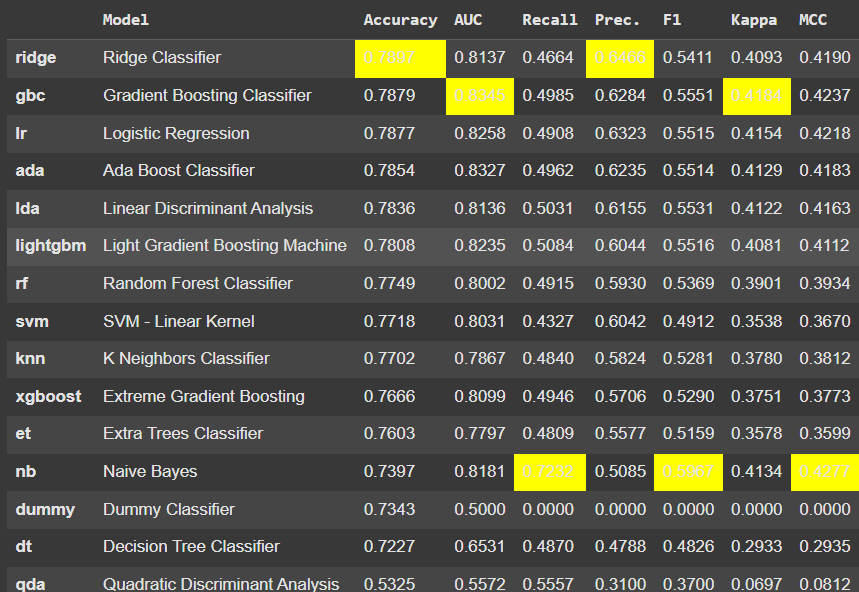

### **Naive Bayes**

In [42]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Initialize Gaussian Naive Bayes Classifier
gnb = GaussianNB()

# Train the model
gnb.fit(X_train, y_train)

# Make predictions on the test data
y_pred_gnb = gnb.predict(X_test)

# Calculate evaluation metrics
accuracy_gnb = accuracy_score(y_test, y_pred_gnb)
precision_gnb = precision_score(y_test, y_pred_gnb)
recall_gnb = recall_score(y_test, y_pred_gnb)
f1_gnb = f1_score(y_test, y_pred_gnb)
conf_matrix_gnb = confusion_matrix(y_test, y_pred_gnb)

# Print the metrics
print(f"Naive Bayes Accuracy: {accuracy_gnb:.4f}")
print(f"Naive Bayes Precision: {precision_gnb:.4f}")
print(f"Naive Bayes Recall: {recall_gnb:.4f}")
print(f"Naive Bayes F1-Score: {f1_gnb:.4f}")
print("Naive Bayes Confusion Matrix:")
print(conf_matrix_gnb)

Naive Bayes Accuracy: 0.7313
Naive Bayes Precision: 0.4962
Naive Bayes Recall: 0.7005
Naive Bayes F1-Score: 0.5809
Naive Bayes Confusion Matrix:
[[767 266]
 [112 262]]


### **Linear Discriminant Analysis Model**

In [43]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Initialize Linear Discriminant Analysis Classifier
lda_model = LinearDiscriminantAnalysis()

# Train the model
lda_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred_lda = lda_model.predict(X_test)

# Calculate evaluation metrics
accuracy_lda = accuracy_score(y_test, y_pred_lda)
precision_lda = precision_score(y_test, y_pred_lda)
recall_lda = recall_score(y_test, y_pred_lda)
f1_lda = f1_score(y_test, y_pred_lda)
conf_matrix_lda = confusion_matrix(y_test, y_pred_lda)

# Print the metrics
print(f"LDA Accuracy: {accuracy_lda:.4f}")
print(f"LDA Precision: {precision_lda:.4f}")
print(f"LDA Recall: {recall_lda:.4f}")
print(f"LDA F1-Score: {f1_lda:.4f}")
print("LDA Confusion Matrix:")
print(conf_matrix_lda)

LDA Accuracy: 0.7775
LDA Precision: 0.6013
LDA Recall: 0.4840
LDA F1-Score: 0.5363
LDA Confusion Matrix:
[[913 120]
 [193 181]]


In [47]:
telecom_encoded.to_csv('/content/telecom_encoded.csv', index=False)

## **Análisis de la Importancia de las Variables**

Estudio de cuántas variables y cuáles debe tener el modelo para presentar un mejor rendimiento

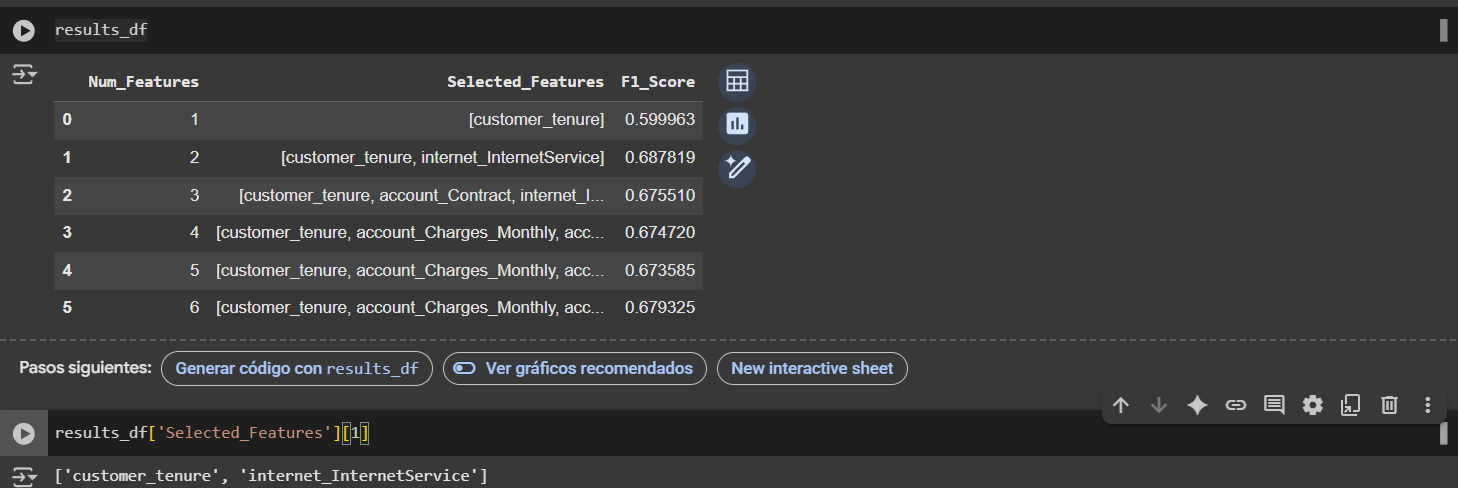

# **Conclusión**
Basados en el anterior proyecto nos dimos cuenta que los modelos que presentan un mejor rendimiento son Naive Bayes y Linear Discriminant Analysis, estos resultados se llevaron a cabo por medio de una prueba que permite probar cada uno de los modelos y sacar las métricas, arrojando al final los resultados de cada uno de estos. Los modelos se evaluaron tenien do en cuenta el F1 score, ya que es la métrica más adecuada al momento de evaluar un modelo de clasificación.


Las variables que fueron seleccionadas como las más importantes para el modelo y con las cuáles se podría presentar un mejor rendimiento elevando el f1 score a un 68.78%, estas variables fueron dos: 'customer_tenure' e 'internet_InternetService'.


Se hallaron diferentes tipos de relaciones, donde, aunque hubo excepciones, los datos apuntaron a ser de gran influencia para la cancelación, una de estas fue la relación entre el tiempo de contro y la cancelación, otra fue la relación entre el gasto total y la cancelación, ambos mostrando en que cuanto menores fueran los valores, mayor sería la probabilidad de abandono. Una forma de interpretar esto sería que entre menor fuera el gasto total, esto implicaba que la persona llevaba menos tiempo en la empresa, si lo pasamos a los datos hallados anteriormente, la gran mayoría de personas que no cuentan con mun tiempo amplio en la empresa son propensar a abandonar el servicio. Como se dijo anteriormente hubo algunas excepciones, o bien llamados outliers, que eras clientes que se comportaban fuera del patrón marcado, estos no se tomaron tan en cuenta al momento del análisis.

Teniendo en cuenta algunos de los anteriores análisis se puede llegar a la conclusión de que se debe hacer o generar iniciativas a las personas con contratos cortos para que amplíen sus contratos, ya que se demostró que entre más corto fuera el contrato, mayor sería la probabilidad de cancelación, y a parte también generar campañas de fidelización hacia los clientes nuevos, brindando beneficios para fomentar una dinámica donde estos se sinetan parte importante de nuestra empresa.